In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['sea-sponge']


In [2]:
#reading data
#Dataset from NOAA's DSCRTP and then filtered for sea sponges
data = pd.read_csv('../input/sea-sponge/sea_sponges.csv')

**1. EXAMINE THE DATA**

In [3]:
data.head() #getting the first 5 rows from the data frame

,CatalogNumber,DataProvider,ScientificName,VernacularNameCategory,TaxonRank,Station,ObservationDate,latitude,longitude,DepthInMeters,DepthMethod,Locality,LocationAccuracy,SurveyID,Repository,IdentificationQualifier,EventID,SamplingEquipment,RecordType,SampleID
0,457287.0,California Academy of Sciences,Calcarea,calcareous sponge,class,232-23,2000-06-12,51.96589,-172.62490,202.0,averaged,Alaska; Aleutian Islands,>1000m,200001,California Academy of Sciences; Invertebrate Z...,morphological ID by taxonomic expert,81,trawl,specimen,CAS 160205
1,425601.0,"NOAA, Olympic Coast National Marine Sanctuary",Iophon lamella,demosponge,species,20,2006-05-27,48.14662,-125.37742,113.0,reported,Olympic Coast National Marine Sanctuary,100m,AR06-07/07 (OCNMS200606),"NOAA, Olympic Coast National Marine Sanctuary",ID by non-expert from video,953,ROV,video observation,40999
2,427517.0,"NOAA, Olympic Coast National Marine Sanctuary",Latrunculia sp.,demosponge,genus,14,2008-07-11,48.17692,-125.37122,111.0,reported,Olympic Coast National Marine Sanctuary,100m,OCNMS200807,"NOAA, Olympic Coast National Marine Sanctuary",ID by non-expert from video,1160,ROV,video observation,15465
3,431030.0,"NOAA, Olympic Coast National Marine Sanctuary",Latrunculia sp.,demosponge,genus,14,2008-07-11,48.17379,-125.37267,113.0,reported,Olympic Coast National Marine Sanctuary,100m,OCNMS200807,"NOAA, Olympic Coast National Marine Sanctuary",ID by non-expert from video,1160,ROV,video observation,18139
4,435432.0,"NOAA, Olympic Coast National Marine Sanctuary",Latrunculia sp.,demosponge,genus,2,2006-05-30,48.24621,-125.01188,210.0,reported,Olympic Coast National Marine Sanctuary,100m,AR06-07/07 (OCNMS200606),"NOAA, Olympic Coast National Marine Sanctuary",ID by non-expert from video,95502,ROV,video observation,52650


In [4]:
# Lets see our data's columns
data.columns

Index(['CatalogNumber', 'DataProvider', 'ScientificName',
       'VernacularNameCategory', 'TaxonRank', 'Station', 'ObservationDate',
       'latitude', 'longitude', 'DepthInMeters', 'DepthMethod', 'Locality',
       'LocationAccuracy', 'SurveyID', 'Repository', 'IdentificationQualifier',
       'EventID', 'SamplingEquipment', 'RecordType', 'SampleID'],
      dtype='object')

In [5]:
data.shape # (rows, columns(features))

(32064, 20)

In [6]:
#checking if there is any null values, and if exists, it drops the row
data = data.dropna()
data.shape

(32064, 20)

In [7]:
# To examine how many entries are there in the data:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32064 entries, 0 to 32063
Data columns (total 20 columns):
CatalogNumber              32064 non-null float64
DataProvider               32064 non-null object
ScientificName             32064 non-null object
VernacularNameCategory     32064 non-null object
TaxonRank                  32064 non-null object
Station                    32064 non-null object
ObservationDate            32064 non-null object
latitude                   32064 non-null float64
longitude                  32064 non-null float64
DepthInMeters              32064 non-null float64
DepthMethod                32064 non-null object
Locality                   32064 non-null object
LocationAccuracy           32064 non-null object
SurveyID                   32064 non-null object
Repository                 32064 non-null object
IdentificationQualifier    32064 non-null object
EventID                    32064 non-null object
SamplingEquipment          32064 non-null object
Recor

In [8]:
set(data.VernacularNameCategory) #unique classes of data

{'calcareous sponge',
 'demosponge',
 'glass sponge',
 'scleromorph sponge',
 'sponge (unspecified)'}

In [9]:
sponge_count = pd.DataFrame(data.VernacularNameCategory.value_counts())
sponge_count #gives the counts of each classes

,VernacularNameCategory
demosponge,13252
glass sponge,11812
sponge (unspecified),6833
scleromorph sponge,166
calcareous sponge,1


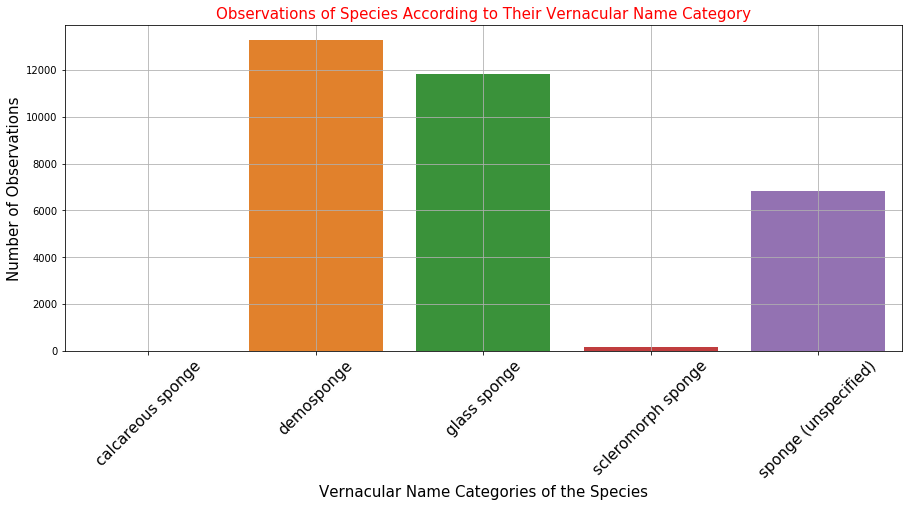

In [10]:
# Showing speciy observations according to the vernacular name category (count plot example) 
plt.figure(figsize=(15,6))
sns.countplot(data.VernacularNameCategory)
plt.grid()
plt.title('Observations of Species According to Their Vernacular Name Category', fontsize=15, color='red')
plt.xlabel('Vernacular Name Categories of the Species',fontsize=15)
plt.ylabel('Number of Observations',fontsize=15)
plt.xticks(rotation='45',fontsize=15)
plt.show()

In [11]:
def change_tgt_column(data): #to move the target variable to the last
    cols = data.columns.tolist()
    cols = cols[:3] + cols[4:]
    cols.append("VernacularNameCategory")
    data=data[cols]
    return data 

In [12]:
data=change_tgt_column(data)

In [13]:
data.head()

,CatalogNumber,DataProvider,ScientificName,TaxonRank,Station,ObservationDate,latitude,longitude,DepthInMeters,DepthMethod,Locality,LocationAccuracy,SurveyID,Repository,IdentificationQualifier,EventID,SamplingEquipment,RecordType,SampleID,VernacularNameCategory
0,457287.0,California Academy of Sciences,Calcarea,class,232-23,2000-06-12,51.96589,-172.62490,202.0,averaged,Alaska; Aleutian Islands,>1000m,200001,California Academy of Sciences; Invertebrate Z...,morphological ID by taxonomic expert,81,trawl,specimen,CAS 160205,calcareous sponge
1,425601.0,"NOAA, Olympic Coast National Marine Sanctuary",Iophon lamella,species,20,2006-05-27,48.14662,-125.37742,113.0,reported,Olympic Coast National Marine Sanctuary,100m,AR06-07/07 (OCNMS200606),"NOAA, Olympic Coast National Marine Sanctuary",ID by non-expert from video,953,ROV,video observation,40999,demosponge
2,427517.0,"NOAA, Olympic Coast National Marine Sanctuary",Latrunculia sp.,genus,14,2008-07-11,48.17692,-125.37122,111.0,reported,Olympic Coast National Marine Sanctuary,100m,OCNMS200807,"NOAA, Olympic Coast National Marine Sanctuary",ID by non-expert from video,1160,ROV,video observation,15465,demosponge
3,431030.0,"NOAA, Olympic Coast National Marine Sanctuary",Latrunculia sp.,genus,14,2008-07-11,48.17379,-125.37267,113.0,reported,Olympic Coast National Marine Sanctuary,100m,OCNMS200807,"NOAA, Olympic Coast National Marine Sanctuary",ID by non-expert from video,1160,ROV,video observation,18139,demosponge
4,435432.0,"NOAA, Olympic Coast National Marine Sanctuary",Latrunculia sp.,genus,2,2006-05-30,48.24621,-125.01188,210.0,reported,Olympic Coast National Marine Sanctuary,100m,AR06-07/07 (OCNMS200606),"NOAA, Olympic Coast National Marine Sanctuary",ID by non-expert from video,95502,ROV,video observation,52650,demosponge


In [14]:
data.dtypes  #check the data type of each feature

CatalogNumber              float64
DataProvider                object
ScientificName              object
TaxonRank                   object
Station                     object
ObservationDate             object
latitude                   float64
longitude                  float64
DepthInMeters              float64
DepthMethod                 object
Locality                    object
LocationAccuracy            object
SurveyID                    object
Repository                  object
IdentificationQualifier     object
EventID                     object
SamplingEquipment           object
RecordType                  object
SampleID                    object
VernacularNameCategory      object
dtype: object

In [15]:
data=data.drop(["CatalogNumber","DataProvider","ObservationDate","Station","ObservationDate","SurveyID","Repository","IdentificationQualifier","EventID",                
"SamplingEquipment","RecordType","SampleID"],axis=1) #dropping few columns which are irrelevant for predictions

In [16]:
data.head()

,ScientificName,TaxonRank,latitude,longitude,DepthInMeters,DepthMethod,Locality,LocationAccuracy,VernacularNameCategory
0,Calcarea,class,51.96589,-172.62490,202.0,averaged,Alaska; Aleutian Islands,>1000m,calcareous sponge
1,Iophon lamella,species,48.14662,-125.37742,113.0,reported,Olympic Coast National Marine Sanctuary,100m,demosponge
2,Latrunculia sp.,genus,48.17692,-125.37122,111.0,reported,Olympic Coast National Marine Sanctuary,100m,demosponge
3,Latrunculia sp.,genus,48.17379,-125.37267,113.0,reported,Olympic Coast National Marine Sanctuary,100m,demosponge
4,Latrunculia sp.,genus,48.24621,-125.01188,210.0,reported,Olympic Coast National Marine Sanctuary,100m,demosponge


In [17]:
obj_df = data.select_dtypes(include=['object']).copy()
obj_df.head() #selecting the type object in order to convert it into numerical data

,ScientificName,TaxonRank,DepthMethod,Locality,LocationAccuracy,VernacularNameCategory
0,Calcarea,class,averaged,Alaska; Aleutian Islands,>1000m,calcareous sponge
1,Iophon lamella,species,reported,Olympic Coast National Marine Sanctuary,100m,demosponge
2,Latrunculia sp.,genus,reported,Olympic Coast National Marine Sanctuary,100m,demosponge
3,Latrunculia sp.,genus,reported,Olympic Coast National Marine Sanctuary,100m,demosponge
4,Latrunculia sp.,genus,reported,Olympic Coast National Marine Sanctuary,100m,demosponge


In [18]:
float_df=data.select_dtypes(include=['float64']).copy() #copying the float64 type feature for future use.

In [19]:
from sklearn.preprocessing import LabelEncoder #used to convert the target data into numerical
from sklearn.preprocessing import OrdinalEncoder #used to convert the features into numerical

In [20]:
ord_enc = OrdinalEncoder() #calling the encoder
obj_df["ScientificName_code"] = ord_enc.fit_transform(obj_df[["ScientificName"]]) #changing to a numerical value
obj_df["TaxonRank_code"] = ord_enc.fit_transform(obj_df[["TaxonRank"]])
obj_df["DepthMethod_code"] = ord_enc.fit_transform(obj_df[["DepthMethod"]])
obj_df["Locality_code"] = ord_enc.fit_transform(obj_df[["Locality"]])
obj_df["LocationAccuracy_code"] = ord_enc.fit_transform(obj_df[["LocationAccuracy"]])

num_data=pd.concat([obj_df["ScientificName_code"],obj_df["TaxonRank_code"],obj_df["DepthMethod_code"],obj_df["Locality_code"],obj_df["LocationAccuracy_code"]],axis=1)

In [21]:
le=LabelEncoder()
obj_df["VernacularNameCategory_code"]=le.fit_transform(obj_df["VernacularNameCategory"]) 
#using label encoder to give unique labels to the class

In [22]:
num_data=pd.concat([num_data,obj_df["VernacularNameCategory_code"]],axis=1)
num_data=pd.concat([num_data,float_df],axis=1)

In [23]:
cols=num_data.columns.tolist()
cols=cols[:5]+cols[6:]
cols.append("VernacularNameCategory_code")
numerical_data=num_data[cols]
numerical_data.head()

,ScientificName_code,TaxonRank_code,DepthMethod_code,Locality_code,LocationAccuracy_code,latitude,longitude,DepthInMeters,VernacularNameCategory_code
0,18.0,0.0,1.0,2.0,4.0,51.96589,-172.62490,202.0,0
1,76.0,5.0,2.0,71.0,1.0,48.14662,-125.37742,113.0,1
2,84.0,2.0,2.0,71.0,1.0,48.17692,-125.37122,111.0,1
3,84.0,2.0,2.0,71.0,1.0,48.17379,-125.37267,113.0,1
4,84.0,2.0,2.0,71.0,1.0,48.24621,-125.01188,210.0,1


In [24]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [25]:
def prepare_data(data):
    dataset=data.values
    X=dataset[:,:-1] #taking all the features
    # format all fields as string
    X = X.astype(str)
    y=dataset[:,-1] #taking target variable
    return X,y

In [26]:
X,y=prepare_data(numerical_data)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) #train data=67% of data, test data=33% of data

In [28]:
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (21482, 8) (21482,)
Test (10582, 8) (10582,)


In [29]:
from keras.utils import to_categorical
y_train1 = to_categorical(y_train,5) #converting the target data into binary data
y_test1=to_categorical(y_test,5)

In [30]:
y_train1.shape #after one hot encoding, the shape becomes (no of samples,no of classes)

(21482, 5)

In [35]:
# define the  model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu')) #layer with 32 neurons
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train1.shape[1], activation='softmax'))
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history=model.fit(X_train, y_train1, epochs=25, batch_size=64, validation_data=(X_test,y_test1))

Train on 21482 samples, validate on 10582 samples
Epoch 1/25
21482/21482 [==============================] - 2s 80us/step - loss: 1.1655 - acc: 0.8109 - val_loss: 0.3374 - val_acc: 0.9204
Epoch 2/25
21482/21482 [==============================] - 1s 60us/step - loss: 0.3345 - acc: 0.9075 - val_loss: 0.2085 - val_acc: 0.9301
Epoch 3/25
21482/21482 [==============================] - 1s 61us/step - loss: 0.2132 - acc: 0.9315 - val_loss: 0.1790 - val_acc: 0.9413
Epoch 4/25
21482/21482 [==============================] - 1s 61us/step - loss: 0.1782 - acc: 0.9417 - val_loss: 0.1716 - val_acc: 0.9531
Epoch 5/25
21482/21482 [==============================] - 1s 62us/step - loss: 0.1610 - acc: 0.9490 - val_loss: 0.1941 - val_acc: 0.9283
Epoch 6/25
21482/21482 [==============================] - 1s 60us/step - loss: 0.1502 - acc: 0.9520 - val_loss: 0.1284 - val_acc: 0.9645
Epoch 7/25
21482/21482 [==============================] - 1s 63us/step - loss: 0.1295 - acc: 0.9608 - val_loss: 0.1175 - val_acc

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_8 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_9 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_10 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_11 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 325       
Total params: 60,517
Trainable params: 60,517
Non-trainable params: 0
_________________________________________________________________


> In the first layer, number of neurons in present and previous layer is 32 and 8. 
Thus it becomes: 32 x 8 + bias(32) = 288

> In the second layer, number of neurons in present and previous layer is 64 and 32. 
Thus it becomes: 64 x 32 + bias(64) = 2112

> In the third layer, number of neurons in present and previous layer is 128 and 64. 
Thus it becomes: 128 x 64 + bias(128) = 8320

> In the fourth layer, number of neurons in present and previous layer is 256 and 128. 
Thus it becomes: 256 x 128 + bias(256) = 33024

> In the fifth layer, number of neurons in present and previous layer is 64 and 256. 
Thus it becomes: 64 x 256 + bias(64) = 16448

> Final layer is a softmax layer, which gives distributes probabilities for each classes, and the index with the highest probability is considered as the predicted class by the model. (np.argmax[predicted],axis=1)

In [37]:
_, accuracy = model.evaluate(X_test, y_test1)
print('Accuracy: %.2f' % (accuracy*100))

10582/10582 [==============================] - 0s 34us/step
Accuracy: 98.18


In [38]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

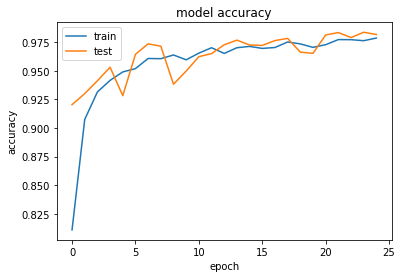

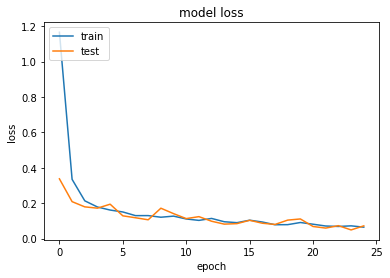

In [40]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [42]:
evaluate=model.predict(X_test)
pred=np.argmax(evaluate,axis=1)
acc = accuracy_score(pred,y_test)
classification_r=classification_report(pred,y_test)
print("Accuracy: ",acc*100)
print("Classification Report:\n",classification_r)

Accuracy:  98.17614817614817
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.98      0.99      0.98      4392
         2.0       0.99      0.96      0.98      3974
         3.0       0.91      0.95      0.93        61
         4.0       0.97      1.00      0.99      2155

   micro avg       0.98      0.98      0.98     10582
   macro avg       0.77      0.78      0.78     10582
weighted avg       0.98      0.98      0.98     10582



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [43]:
classes=['calcareous sponge','demosponge','glass sponge','scleromorph sponge','sponge (unspecified)']

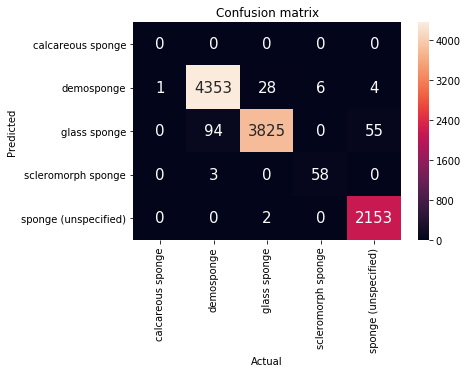

In [45]:
confusion_mat=confusion_matrix(pred,y_test)
import seaborn as sns
#plotting confusion matrix
ax = plt.axes()
sns.heatmap(confusion_mat, annot=True, 
           annot_kws={"size": 15}, 
           xticklabels=classes, 
           yticklabels=classes, ax = ax,fmt="d")
ax.set_title('Confusion matrix')
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
plt.show()

Observation: Since there is only one data point with 'calcareous sponge' as label, it is misclassified into "demosponge".